# Indian Food 101

# Content

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

# Column Description

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

# 1. Loading necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.Loading Dataset:

In [2]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# a. Shape of given dataset:

In [3]:
df.shape

(255, 9)

# b. To find null values:

In [4]:
# To find the null value percentage:
df.isnull().sum() / len(df) *100

name              0.000000
ingredients       0.000000
diet              0.000000
prep_time         0.000000
cook_time         0.000000
flavor_profile    0.000000
course            0.000000
state             0.000000
region            0.392157
dtype: float64

In [5]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

# c. Split the numerical and categorical columns for preprocessing:

In [6]:
num_data = df.select_dtypes(include = np.number)
num_data.head()

,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40


In [7]:
# categorical Data:

In [8]:
cat_data = df.select_dtypes(exclude = np.number)
cat_data.head()

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East


# Null Value Imputation:

In [9]:
# In the column description of dataset, states clearly -1 in any column should be treated as null value. 

In [10]:
for i in num_data.columns:
    print(num_data[i].value_counts())

 10     98
 20     40
-1      30
 15     22
 5      16
 30     12
 25      5
 45      5
 120     5
 240     4
 40      3
 360     3
 60      2
 180     2
 80      1
 70      1
 35      1
 150     1
 12      1
 480     1
 495     1
 500     1
Name: prep_time, dtype: int64
 30     59
 20     42
-1      28
 40     27
 60     22
 45     15
 25     13
 50     10
 35      9
 90      7
 10      7
 15      5
 120     3
 5       3
 55      1
 75      1
 6       1
 2       1
 720     1
Name: cook_time, dtype: int64


In [11]:
# In the problem description its given clearly, Presence of -1 in any of the columns indicates NaN value.

# replace -1 with null values can be done only with string.

num_data['prep_time'] = num_data['prep_time'].astype(str).replace({'-1':np.nan})
num_data['cook_time'] = num_data['cook_time'].astype(str).replace({'-1':np.nan})

In [12]:
num_data['prep_time'] = num_data['prep_time'].fillna(num_data['prep_time'].mean())
num_data['cook_time'] = num_data['cook_time'].fillna(num_data['cook_time'].mean())

In [13]:
# Converting string datatype into int datatype:
num_data['prep_time'] = num_data['prep_time'].astype(int)
num_data['cook_time'] = num_data['cook_time'].astype(int)

In [14]:
num_data.isnull().sum()

prep_time    0
cook_time    0
dtype: int64

In [15]:
# numerical Data Statistical analysis:
num_data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,35.341176,38.811765
std,71.597335,46.619036
min,5.000000,2.000000
25%,10.000000,25.000000
50%,15.000000,30.000000
75%,30.000000,40.000000
max,500.000000,720.000000


In [16]:
for i in df.columns:
    ser = pd.Series()
    ser = df[i].value_counts()
    val = pd.Series()
    val = ser[(ser.index==-1)|(ser.index=='-1')]
    if len(val)!=0:
        print(val)

-1    30
Name: prep_time, dtype: int64
-1    28
Name: cook_time, dtype: int64
-1    29
Name: flavor_profile, dtype: int64
-1    24
Name: state, dtype: int64
-1    13
Name: region, dtype: int64


In [17]:
for i in cat_data.columns:
    print(cat_data[i].value_counts())

Dudhi halwa         1
Sev tameta          1
Dal tadka           1
Puli sadam          1
Bhatura             1
                   ..
Jeera Aloo          1
Double ka meetha    1
Sheer korma         1
Khichdi             1
Sandesh             1
Name: name, Length: 255, dtype: int64
Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                 2
Chhena, sugar, ghee                                                       2
Gram flour, ghee, sugar                                                   2
Greens, tomato, mustard seeds, fenugreek seeds                            1
Rose syrup, falooda sev, mixed nuts, saffron, sugar                       1
                                                                         ..
Chicken thighs, basmati rice, star anise, sweet, green chillies           1
Chhena, reduced milk, pistachio                                           1
Chole, rava, yogurt, plain flour, baking soda                             1
Coconut milk, lobster, fresh green c

In [18]:
cat_data.columns

Index(['name', 'ingredients', 'diet', 'flavor_profile', 'course', 'state',
       'region'],
      dtype='object')

In [19]:
cat_data['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [20]:
cat_data['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [21]:
cat_data['flavor_profile'].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [22]:
cat_data['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [23]:
cat_data['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
-1                 24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
Nagaland            1
Haryana             1
NCT of Delhi        1
Uttarakhand         1
Chhattisgarh        1
Tripura             1
Name: state, dtype: int64

In [24]:
# Region, Flavor_profile, State has -1.

In [25]:
# Checking Null values for input feature "flavor_Profile"

In [26]:
cat_data['flavor_profile'].value_counts()

# in detail they have mentioned -1 represent null values. Replacing -1 with nan.

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [27]:
# Replacing -1 to null value to impute:
cat_data['flavor_profile'] = cat_data['flavor_profile'].replace('-1',np.nan)
cat_data['flavor_profile'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [28]:
cat_data['flavor_profile'].isnull().sum()

29

In [29]:
# before encoding null value imputation on input feature "flavor_profile"
cat_data['flavor_profile'] = cat_data['flavor_profile'].fillna(cat_data['flavor_profile'].mode()[0])

In [30]:
cat_data['flavor_profile'].value_counts()

spicy     162
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [31]:
# Checking Null values for input feature "State"

In [32]:
cat_data['state'].value_counts()

# in detail they have mentioned -1 represent null values. Replacing -1 with nan.

Gujarat            35
Punjab             32
Maharashtra        30
-1                 24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
Nagaland            1
Haryana             1
NCT of Delhi        1
Uttarakhand         1
Chhattisgarh        1
Tripura             1
Name: state, dtype: int64

In [33]:
# Replacing -1 to null value to impute:
cat_data['state'] = cat_data['state'].replace('-1',np.nan)
cat_data['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
Nagaland            1
Haryana             1
NCT of Delhi        1
Tripura             1
Uttarakhand         1
Chhattisgarh        1
Name: state, dtype: int64

In [34]:
cat_data['state'].isnull().sum()

24

In [35]:
# before encoding null value imputation on input feature "flavor_profile"
cat_data['state'] = cat_data['state'].fillna(cat_data['state'].mode()[0])

In [36]:
cat_data['state'].value_counts()

Gujarat            59
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
Nagaland            1
Haryana             1
NCT of Delhi        1
Tripura             1
Uttarakhand         1
Chhattisgarh        1
Name: state, dtype: int64

In [37]:
# Checking Null values for input feature "Region"

In [38]:
cat_data['region'].value_counts()

# in detail they have mentioned -1 represent null values. Replacing -1 with nan.

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [39]:
# Replacing -1 to null value to impute:
cat_data['region'] = cat_data['region'].replace('-1',np.nan)
cat_data['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

In [40]:
cat_data['region'].isnull().sum()

14

In [41]:
# before encoding null value imputation on input feature "flavor_profile"
cat_data['region'] = cat_data['region'].fillna(cat_data['region'].mode()[0])

In [42]:
cat_data['region'].value_counts()

West          88
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

# c. set name as index:

In [43]:
dd = pd.merge(num_data,cat_data,left_index = True, right_index = True)
dd.head()

,prep_time,cook_time,name,ingredients,diet,flavor_profile,course,state,region
0,45,25,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
1,80,30,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
2,15,60,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
3,15,30,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
4,15,40,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East


In [44]:
dd.set_index('name',inplace = True)
dd.head()

,prep_time,cook_time,ingredients,diet,flavor_profile,course,state,region
name,,,,,,,,
Balu shahi,45,25,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
Boondi,80,30,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
Gajar ka halwa,15,60,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
Ghevar,15,30,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
Gulab jamun,15,40,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East


# d. Finding the datatypes in the dataset:

In [45]:
dd.dtypes

prep_time          int32
cook_time          int32
ingredients       object
diet              object
flavor_profile    object
course            object
state             object
region            object
dtype: object

# Checking the skewness and kurtosis for numerical features:

1. Measure of Spread:

In [46]:
print('prep_time skewness is:',num_data['prep_time'].skew(),' and ','cook_time skewness is:',num_data['cook_time'].skew())
print('prep_time kurtosis is:',num_data['prep_time'].kurt(),' and ','cook_time kurtosis is:',num_data['cook_time'].kurt())
# Both the numerical data is right skewed and spread is narrow and peak(because of outliers) which is said to be lepto kurtic

prep_time skewness is: 4.656401933138483  and  cook_time skewness is: 12.458923604936764
prep_time kurtosis is: 23.3606845503155  and  cook_time kurtosis is: 180.89422330926158


2. Different Transformation Techinques to reduce skewness:

In [47]:
a = np.power(num_data['prep_time'],0.1).skew()
b = np.power(num_data['cook_time'],0.02).skew()

print(a,b)

1.799143006434783 -0.12239048184077422


In [48]:
a1 = np.log(num_data['prep_time']).skew()
b1 = np.log(num_data['cook_time']).skew()

print(a1,b1)

1.4601866885036374 -0.25959194932174656


In [49]:
a2 = np.sqrt(num_data['prep_time']).skew()
b2 = np.sqrt(num_data['cook_time']).skew()

print(a2,b2)

3.2066347699245368 4.995541824450345


In [50]:
import scipy.stats as stats

In [51]:
x,y = stats.boxcox(num_data['prep_time'])
x1,y1 = stats.boxcox(num_data['cook_time'])
print(pd.DataFrame(x).skew())
print(pd.DataFrame(x1).skew())

0    0.051747
dtype: float64
0    0.054138
dtype: float64


In [52]:
# inference:
# by applying boxcox transformation to cooktime skewness can be reduced to approximately zero.
# by applying boxcox transformation to preptime skewness can be reduced to approxiamtely zero

In [53]:
# Applying suitable Transformation techinuqes:

In [54]:
val ,lam = stats.boxcox(num_data['cook_time'])
num_data['cook_time'] = val

In [55]:
val ,lam = stats.boxcox(num_data['prep_time'])
num_data['prep_time'] = val

3. To check Outliers:

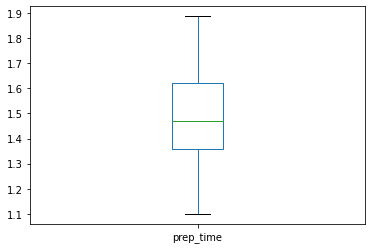

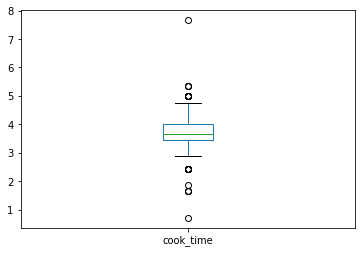

In [56]:
for i in num_data.columns:
    num_data[i].plot(kind = 'box')
    plt.show()

3. To check distribution:

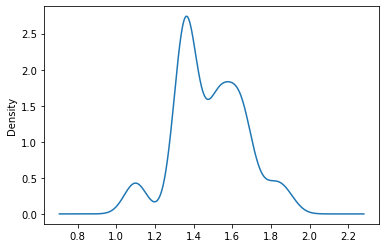

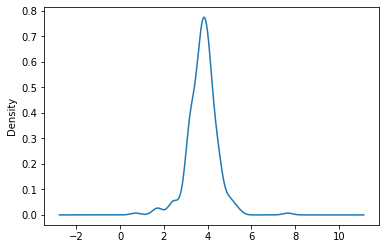

In [57]:
for i in num_data.columns:
    num_data[i].plot(kind='kde')
    plt.show()

In [58]:
# capping:
q1=num_data['prep_time'].quantile(0.25)
q3=num_data['prep_time'].quantile(0.75)
iqr=q3-q1
ub=q3 + 1.5*iqr
lb=q1 - 1.5*iqr
uc=num_data['prep_time'].quantile(0.99)
lc=num_data['prep_time'].quantile(0.01)
for ind1 in num_data['prep_time'].index:
    if num_data.loc[ind1,'prep_time']>ub:
        num_data.loc[ind1,'prep_time']=uc
    if num_data.loc[ind1,'prep_time']<lb:
        num_data.loc[ind1,'prep_time']=lc

In [59]:
num_data['cook_time'].skew()

0.05413785365033067

In [60]:
num_data['prep_time'].skew()

0.05174681952942665

In [61]:
# Checking Outlier after capping and transformation techniques:

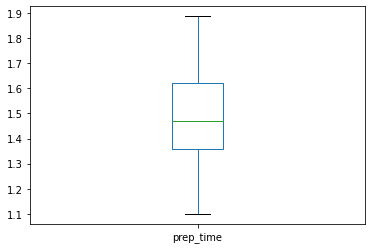

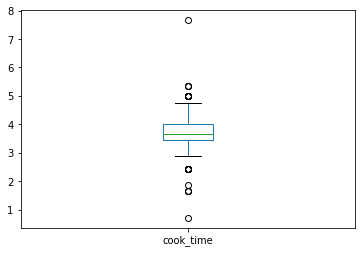

In [62]:
for i in num_data.columns:
    num_data[i].plot(kind = 'box')
    plt.show()

In [63]:
# Checking Distribution after capping and transformation techniques:

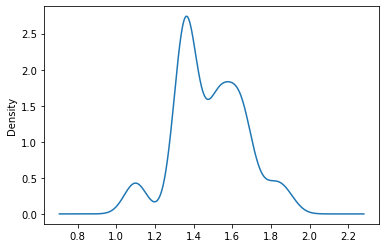

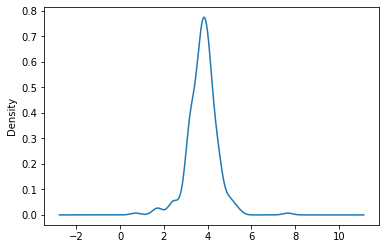

In [64]:
for i in num_data.columns:
    num_data[i].plot(kind='kde')
    plt.show()

In [65]:
num_data.corr()

,prep_time,cook_time
prep_time,1.000000,0.300823
cook_time,0.300823,1.000000


In [66]:
num_data.cov()

,prep_time,cook_time
prep_time,0.031508,0.035331
cook_time,0.035331,0.437791


# 6. Graphical Analysis on different assumption:

a. Checking Skewness of numerical data in histogram:

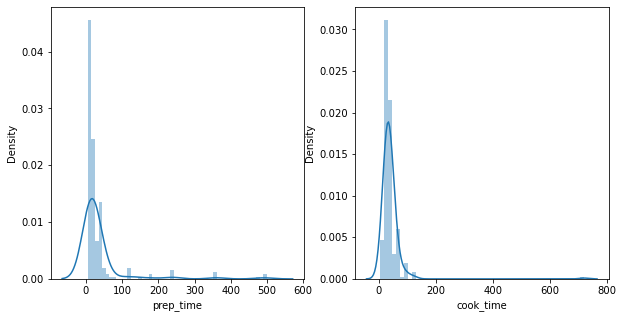

In [67]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(dd['prep_time'],ax = axes[0])
sns.distplot(dd['cook_time'],ax = axes[1])
plt.show()

In [68]:
# Inference: 

# From the above graph both Prep_time and cook_time, data is said to be right skewed and 
# spread is said to Lepto kurtic ie. narrow spread

b. Check the Data correlation using Heatmap and your observation.

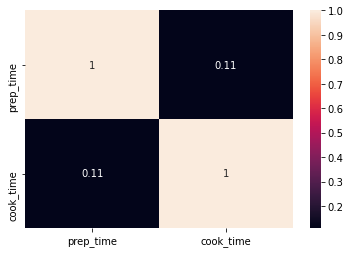

In [69]:
sns.heatmap(dd.corr(),annot = True)
plt.show()

In [70]:
# Inference: 

# From the above heatmap we can conclude that, Prep_time and cook_time is approximately equal to zero. so we can conclude that 
# points are much scattered.

c. Check the effect of preparation time with cooking time in the given dataset.

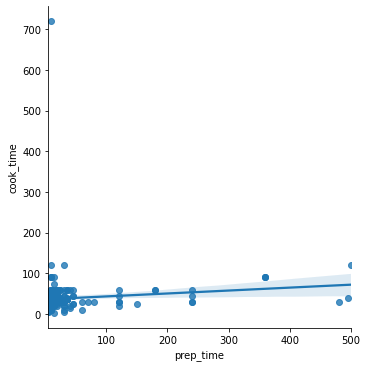

In [71]:
sns.lmplot(x = 'prep_time', y = 'cook_time', data = dd)
plt.show()

In [72]:
# Inference: From the above plot we can infer that some points are much scattered from minimum to maximum in prep_time,
# but have few outlier in cook_time. Therefore we can conclude that points are scattered from min to max.

d. Compare the "Flavor_profile" for each "Region"

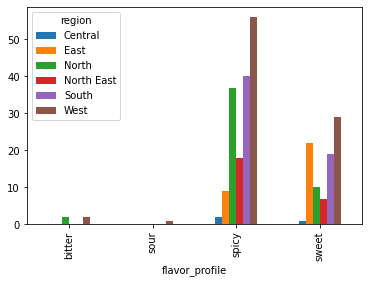

In [73]:
d1 = pd.crosstab(dd['flavor_profile'],dd['region'])
d1.plot(kind = 'bar', stacked = False)
plt.show()

In [74]:
# inference: From the above bargraph we can conclude that, 
# compared to all other regions, West region has highest Spicy flavor_profile and highesh sweet flavor_profile.
# Only north and west region have bitter flavor_profile.
# West region only have Sour flavor_profile

# overall we can conclude that, only West region has all four falvor_profile

e. Compare the "Diet" for each "Region"

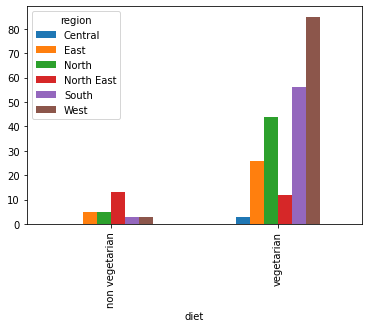

In [75]:
d1 = pd.crosstab(dd['diet'],dd['region'])
d1.plot(kind = 'bar', stacked = False)
plt.show()

In [76]:
# Inference: 
# Among vegetarian diet, West Region occupy maximum number and central region has very low number.
# In case of non-vegetarian, North east has its maximum number, followed by north and east region has its second highest.

# But central region has its profile only with vegetarian numbers.

f. Study the Variation of Course in State

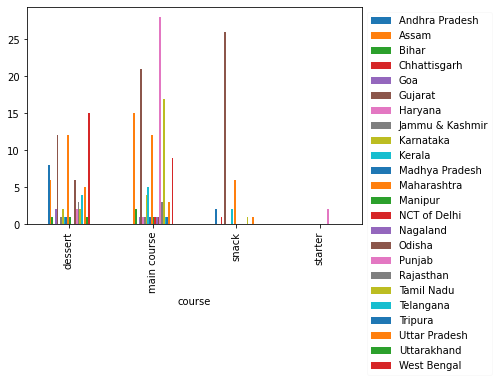

In [77]:
d1 = pd.crosstab(dd['course'],dd['state'])
d1.plot(kind = 'bar', stacked = False)
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0.1,1))
plt.show()

In [78]:
# inference: From the above graph we can conclude that,

# Punjab is the only state which has course with starter
# but incase of dessert and main course most of state has its remarkable number of differnt food items.
# Gujarat is the state which has large number of snack varieties.

g. Compare the Cook_time based on Diet

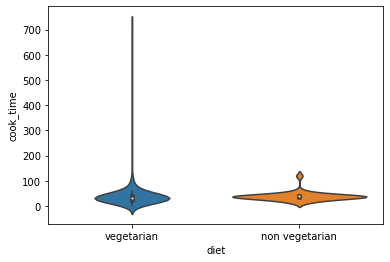

In [79]:
sns.violinplot(y = 'cook_time', x = 'diet', data = dd)
plt.show()

In [80]:
# inference: From the above graph we can conclude that,

# cook_time consumption for vegetarian items are varying large from one item to another. so data is more skewed
# but incase of non-vegetarian, all item will consume more or less same timing. Because data is not much skewed.

h. Compare the Prep_time based on Flavor_profile

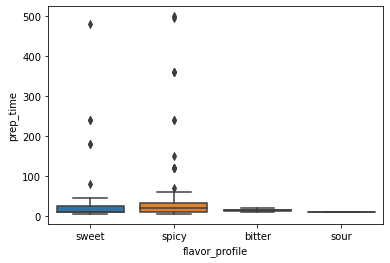

In [81]:
sns.boxplot(x = 'flavor_profile', y = 'prep_time', data = dd)
plt.show()

In [82]:
# Inference: 

# Spicy flavor_profile has large number of outlier, followed by sweet has few outliers.Therefore we can conclude that, 
# based on flavor_profile prep_time will vary for spicy and sweet.

# But incase of Bitter and sour, there is no outlier. so prep_time will remains low for bitter and sour, 
# when compared with sweet and spicy.

i . Find the count of diet as vegetarian for each Region.

In [119]:
dd[dd['diet'] == 'vegetarian'].groupby('region')['course'].count()

region
Central        3
East          26
North         44
North East    12
South         56
West          85
Name: course, dtype: int64

j. List the number of flavor_profile in each state with respect to their region

In [110]:
dd.groupby(['flavor_profile','region','state'])['state'].count()

flavor_profile  region      state          
bitter          North       Punjab              2
                West        Gujarat             2
sour            West        Gujarat             1
spicy           Central     Chhattisgarh        1
                            Madhya Pradesh      1
                East        Odisha              1
                            West Bengal         8
                North       Bihar               2
                            Gujarat             1
                            Haryana             1
                            Jammu & Kashmir     1
                            NCT of Delhi        1
                            Punjab             27
                            Uttar Pradesh       4
                North East  Assam              15
                            Manipur             1
                            Nagaland            1
                            Tripura             1
                South       Andhra Pradesh      2
      

# 7. Encoding different categorical data:

In [83]:
# Nominal data by frequency encoding for input feature as "Diet"

In [84]:
cat_data.head()

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East


In [85]:
cat_data1 = pd.DataFrame()
cat_data1['name'] = cat_data['name']
cat_data1['ingredients'] = cat_data['ingredients']

In [86]:
freq = cat_data['diet'].value_counts(normalize = True) *100
cat_data1['diet'] = cat_data['diet'].map(freq)
cat_data1.head()

,name,ingredients,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451
1,Boondi,"Gram flour, ghee, sugar",88.627451
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451


In [87]:
# encoding: by frequency encoding method:
freq = cat_data['flavor_profile'].value_counts(normalize = True)* 100
cat_data1['flavor_profile'] = cat_data['flavor_profile'].map(freq)

In [88]:
cat_data1.head()

,name,ingredients,diet,flavor_profile
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804
1,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804


In [89]:
# Frequency encoding on input feature "course"
freq1 = cat_data['course'].value_counts(normalize = True)*100
cat_data1['course'] = cat_data['course'].map(freq1)
cat_data1.head()

,name,ingredients,diet,flavor_profile,course
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804,33.333333
1,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804,33.333333
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804,33.333333
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804,33.333333
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804,33.333333


In [90]:
# Frequency Encoding on input feature " State "
freq2 = cat_data['state'].value_counts(normalize = True)*100
cat_data1['state'] = cat_data['state'].map(freq2)
cat_data1.head()

,name,ingredients,diet,flavor_profile,course,state
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804,33.333333,9.411765
1,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804,33.333333,2.352941
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804,33.333333,12.549020
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804,33.333333,2.352941
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804,33.333333,9.411765


In [91]:
# target encoding on input feature " Region"
cat_data1['region'] = cat_data['region']
cat_data1['region'] = cat_data1.groupby('region')['state'].transform('mean')
cat_data1.head()

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804,33.333333,9.411765,7.906388
1,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804,33.333333,2.352941,16.871658
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804,33.333333,12.549020,9.371749
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804,33.333333,2.352941,16.871658
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804,33.333333,9.411765,7.906388


In [92]:
cat_data1.head()

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804,33.333333,9.411765,7.906388
1,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804,33.333333,2.352941,16.871658
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804,33.333333,12.549020,9.371749
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804,33.333333,2.352941,16.871658
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804,33.333333,9.411765,7.906388


In [93]:
num_data.head()

,prep_time,cook_time
0,1.685215,3.464026
1,1.757536,3.675675
2,1.472073,4.496378
3,1.472073,3.675675
4,1.472073,4.013189


# 8. After Encoding combining numerical and categorical columns to form new dataset:

In [94]:
# combining numerical and categorical data for Machine Learning model input:
final_ml_data = pd.merge(num_data,cat_data1,left_index = True, right_index = True)
final_ml_data.head()

,prep_time,cook_time,name,ingredients,diet,flavor_profile,course,state,region
0,1.685215,3.464026,Balu shahi,"Maida flour, yogurt, oil, sugar",88.627451,34.509804,33.333333,9.411765,7.906388
1,1.757536,3.675675,Boondi,"Gram flour, ghee, sugar",88.627451,34.509804,33.333333,2.352941,16.871658
2,1.472073,4.496378,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",88.627451,34.509804,33.333333,12.549020,9.371749
3,1.472073,3.675675,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",88.627451,34.509804,33.333333,2.352941,16.871658
4,1.472073,4.013189,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",88.627451,34.509804,33.333333,9.411765,7.906388


In [95]:
final_ml_data.shape

(255, 9)